In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [58]:
data=pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [59]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Dropping null values 

In [60]:
data.dropna(inplace=True)

In [61]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [62]:
from sklearn.model_selection import train_test_split


### Plotting the Histogram of the curve to check skewness 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

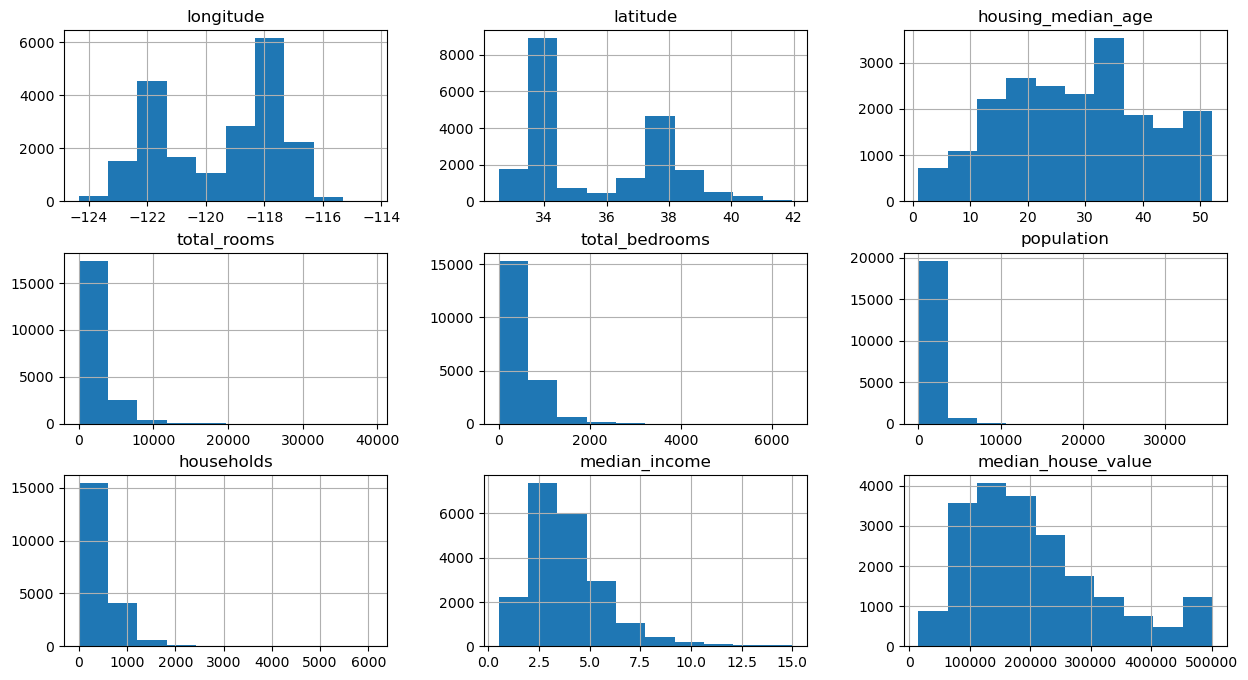

In [64]:
data.hist(figsize=(15,8))

### Observation 
total_room , totle bedroom , housholds are skwed to right side 

<Axes: >

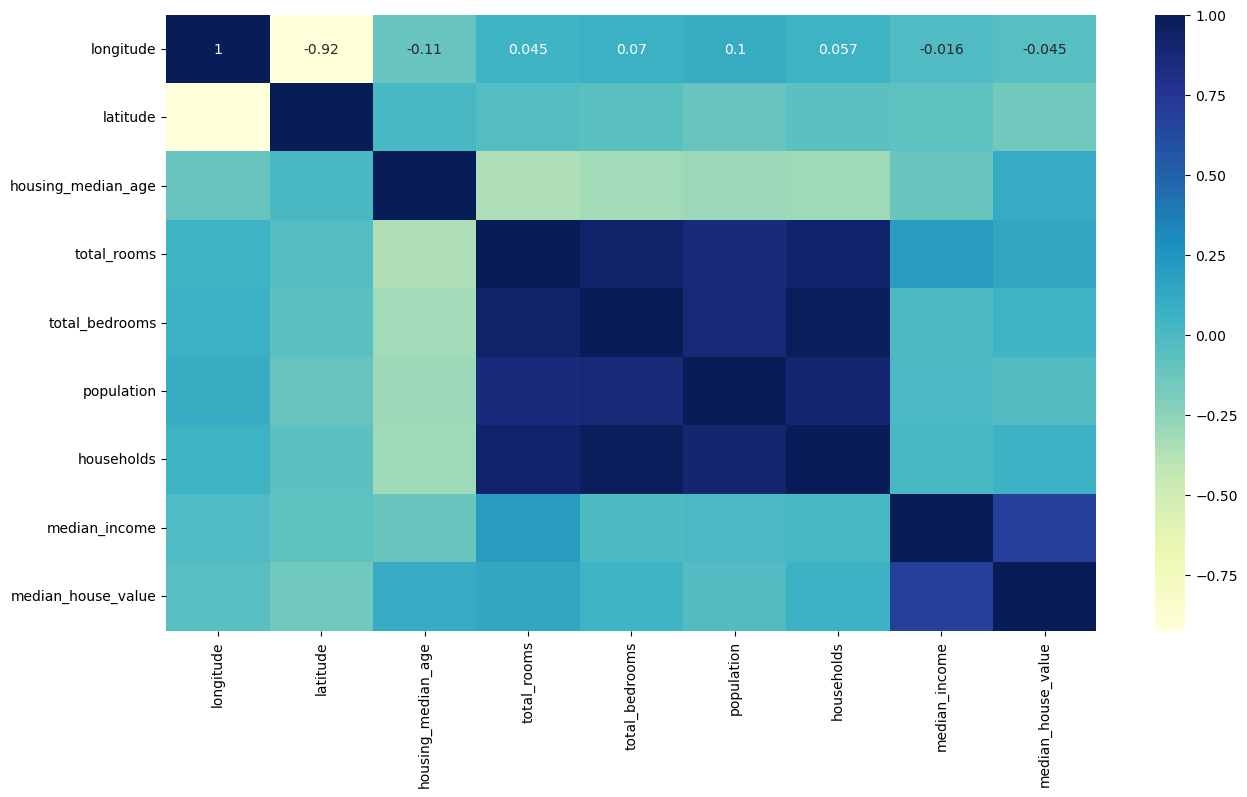

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='YlGnBu')

### taking log of skwed data to normalise the distribution 

In [66]:
data.total_rooms=np.log(data['total_rooms']+1)
data.total_bedrooms=np.log(data['total_bedrooms']+1)
data.population=np.log(data['population']+1)
data.households=np.log(data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

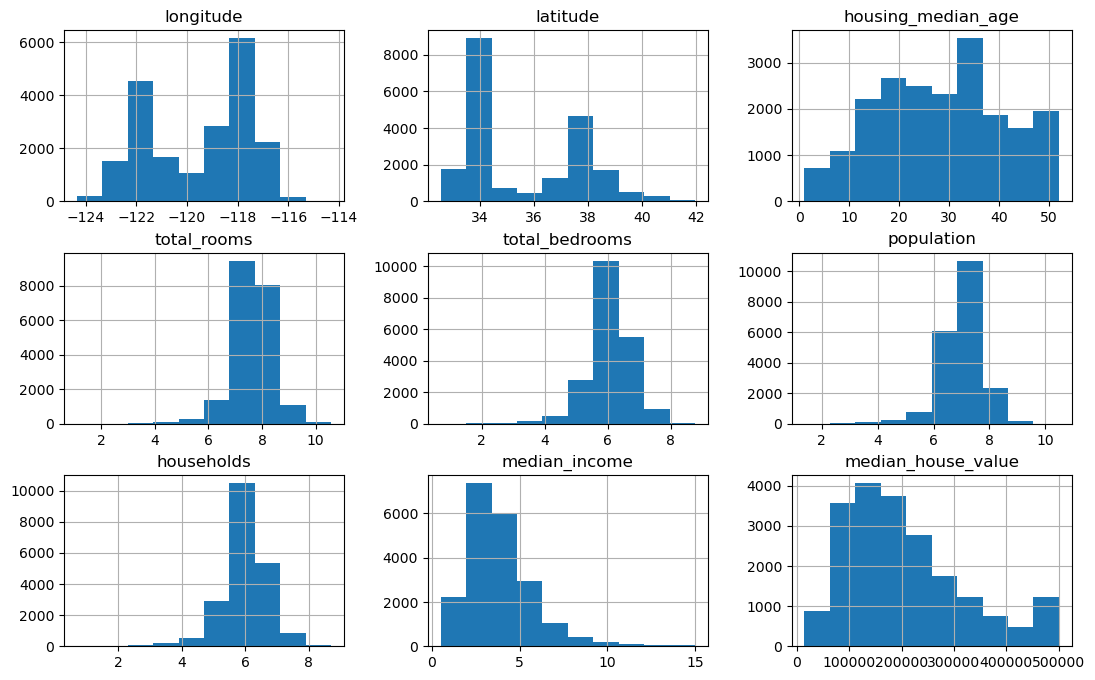

In [67]:
data.hist(figsize=(13,8))

### Performing one hot incoding on ocean_proximity

In [68]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [79]:
data=data.join(pd.get_dummies(data.ocean_proximity).astype(int)).drop(['ocean_proximity'],axis=1)


AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [80]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0,0.799078,1.285243


<Axes: >

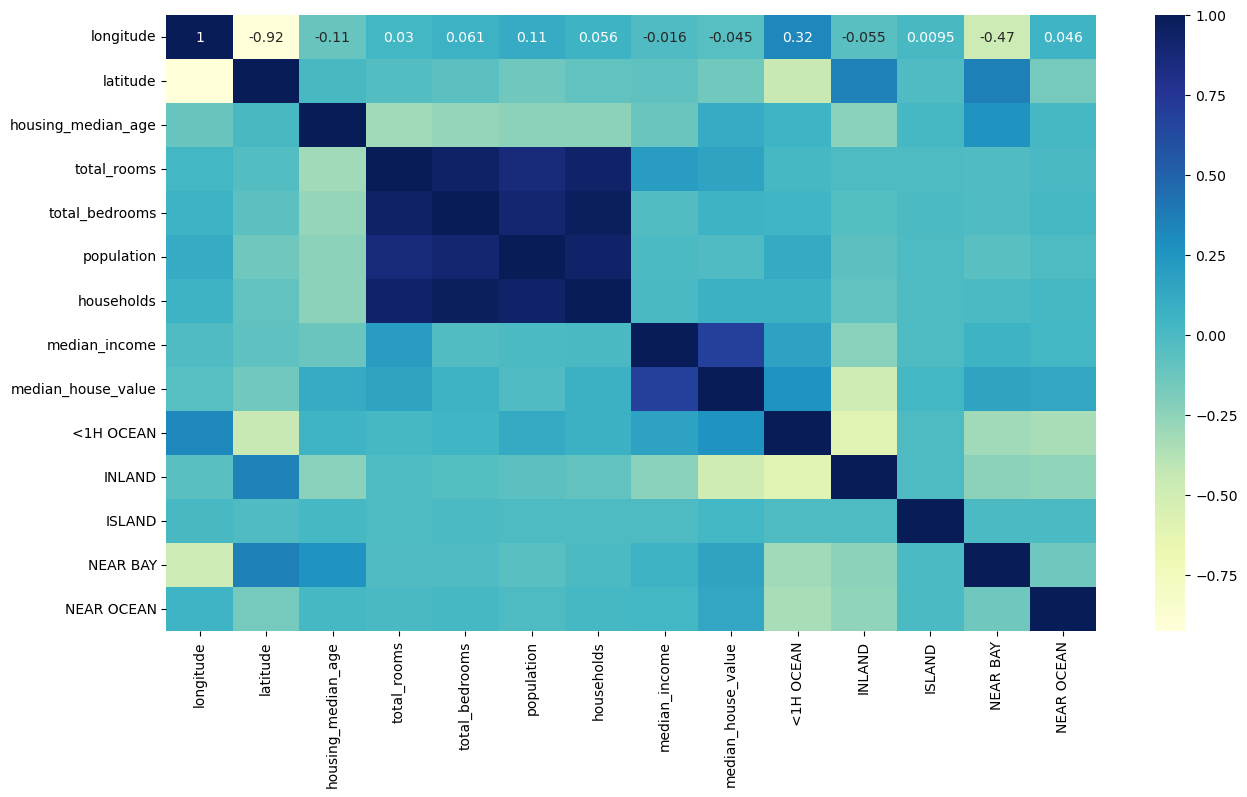

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

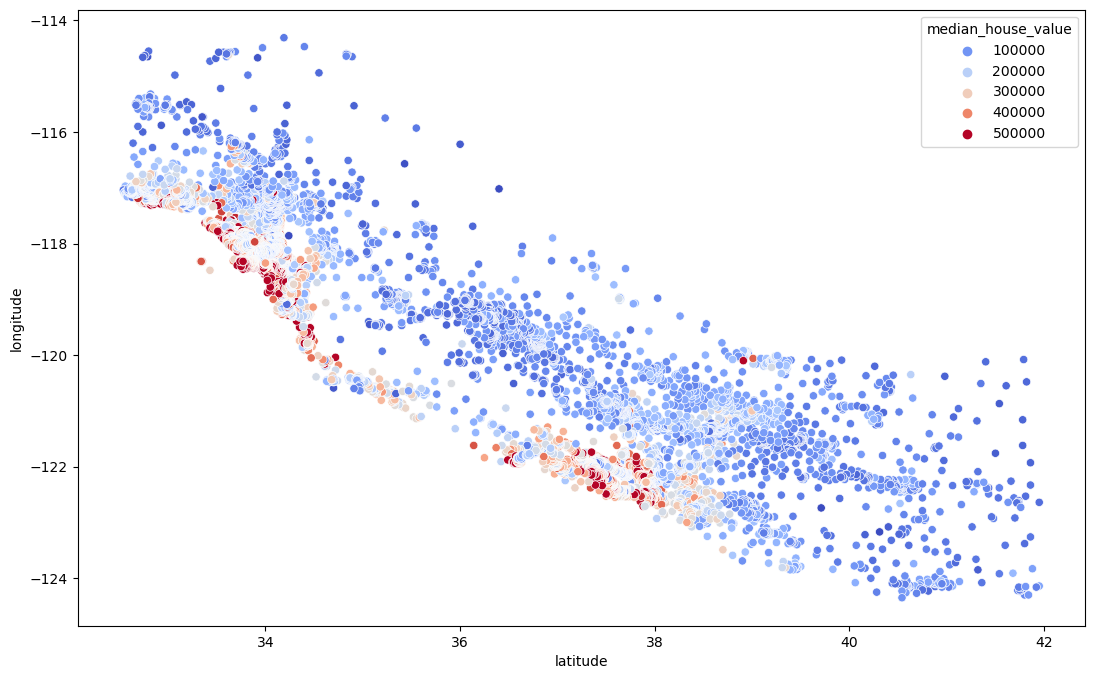

In [81]:
plt.figure(figsize=(13,8))
sns.scatterplot(x='latitude',y='longitude',data=data,hue='median_house_value',palette='coolwarm')

### Observation 
when we plot a scatter plot with longitude and latitude as x and y axis  we can see houses closer to ocean have higher prices.

### performing feature engineering to make some meaningful features


In [82]:
data['bedroom_ratio']=data['total_bedrooms']/data['total_rooms']
data['household_rooms']=data['total_rooms']/data['households']

<Axes: >

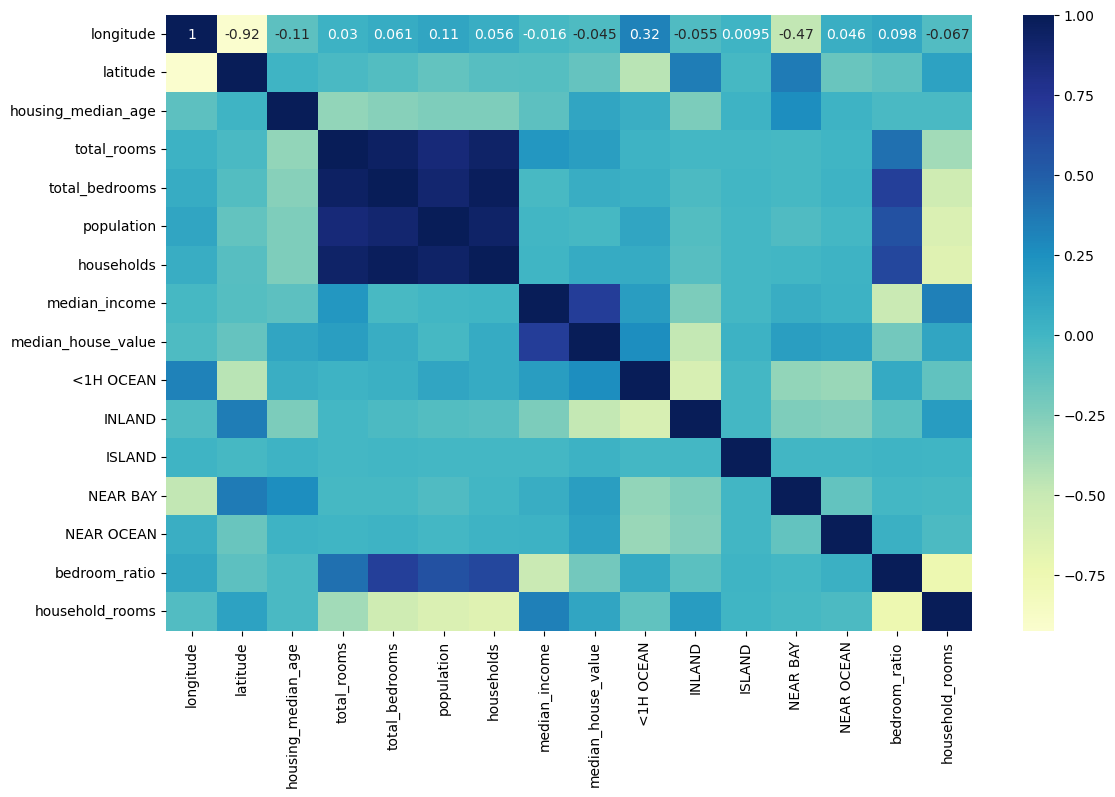

In [83]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',center=0)

In [74]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
bedroom_ratio         0
household_rooms       0
dtype: int64

In [84]:
corr=data.corr()

<Axes: >

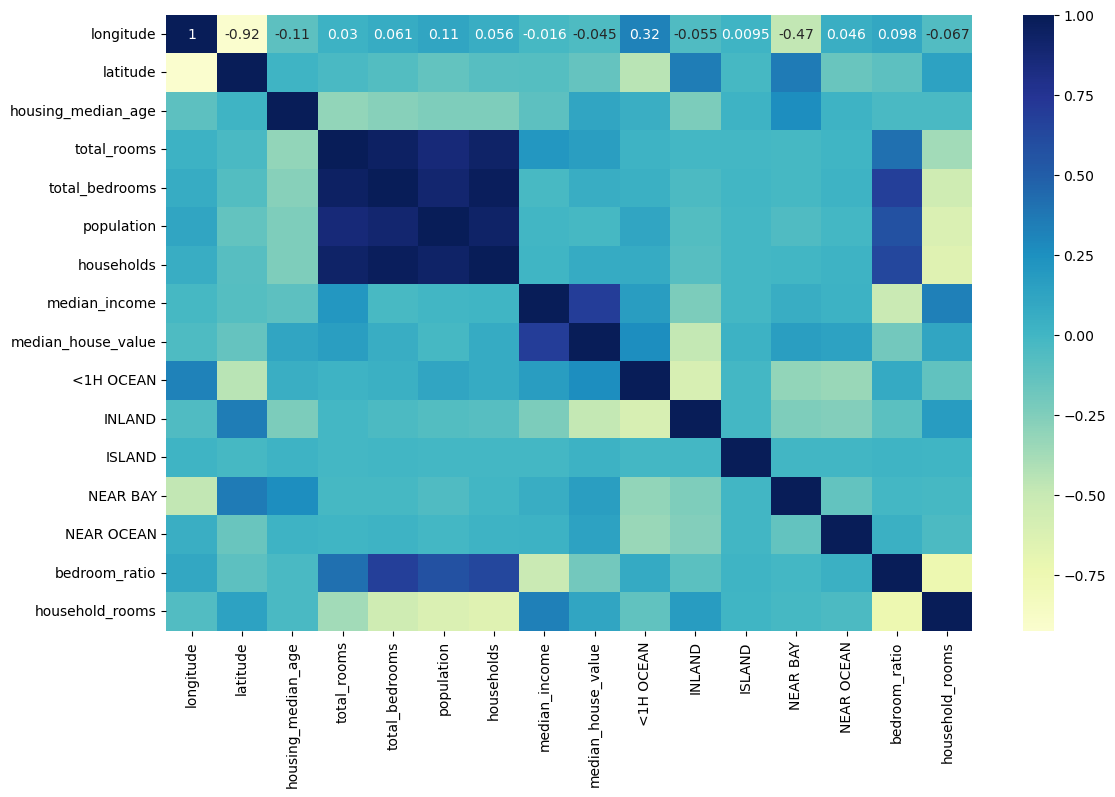

In [85]:
plt.figure(figsize=(13,8))
sns.heatmap(corr,annot=True,cmap='YlGnBu',center=0)

### Performing linear regression to check accuracy 
## Also scaling the data


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()



x=data.drop(['median_house_value'],axis=1)
y=data.median_house_value
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
reg=LinearRegression()

reg.fit(X_train,y_train)


LinearRegression()

In [95]:

reg.score(X_test,y_test)

0.6600712852465991

liner regression gave accuracy of about=66%

### performing random forest regression 

In [98]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(X_train_s,y_train)


RandomForestRegressor()

In [99]:
forest.score(X_test_s,y_test)

0.8129035100222891

defaut random forest estimator gave accuracy of about 81%

### Performing random forest regressing with grid searh cross validation 

In [107]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()
param_grid={"n_estimators":[3,10,30],"max_features":[8,12,20],"min_samples_split":[2,4,6,8]}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [108]:
best_forest=grid_search.best_estimator_

In [109]:
best_forest.score(X_test_s,y_test)

0.8094408793908352

Best case accuracy of about 81%

# Conclusion 
In this predictive analysis project, we developed a model to predict the median cost of houses using the California housing dataset. Our model achieved an accuracy of approximately 81%, demonstrating a strong capability to estimate housing prices based on the provided features.

o achieve this result, we undertook a comprehensive approach involving feature selection and engineering and regression. By carefully selecting relevant features and engineering new ones, we improved the model's performance and ensured it captured the underlying patterns in the data more effectively.

Algorithem used :- Random Forest Regression